In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from string import punctuation

In [2]:
df_products = pd.read_csv('../data/products.csv', header=None, names=['Brand', 'Product','Price','Avg_Rating', 'Five_Stars', 'Four_Stars', 'Three_Stars','Two_Stars', 'One_Stars'])
df_reviews = pd.read_csv('../data/reviews.csv', header=None, names=['Brand', 'Product', 'User_ID', 'Rating','Review', 'BC_emp?','Date', 'Familiarity', 'Gearhead?' ])

### Some Clean Up

In [3]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 9 columns):
Brand          1399 non-null object
Product        1399 non-null object
User_ID        1399 non-null object
Rating         1355 non-null float64
Review         1399 non-null object
BC_emp?        1399 non-null object
Date           1399 non-null object
Familiarity    1104 non-null object
Gearhead?      187 non-null object
dtypes: float64(1), object(8)
memory usage: 98.4+ KB


In [4]:
#Should decide what to do with these
n_nan_reviews = len(df_reviews[df_reviews['Rating'].isnull() == True])
print(n_nan_reviews, "NaN Reviews")

44 NaN Reviews


In [5]:
print(df_products.shape[0],"Products")
print(df_reviews.shape[0], "Reviews")

113 Products
1399 Reviews


In [6]:
df_reviews[df_reviews['Gearhead?'].isnull() == True] = False

In [7]:
df_products['Brand'].unique()

array(['Patagonia', "Arc'teryx", 'The North Face', 'Marmot',
       'Outdoor Research'], dtype=object)

### What are people complaining about

In [8]:
df_reviews[df_reviews['Rating'] == 1]['Review'].values

array([], dtype=object)

### What are people happy about

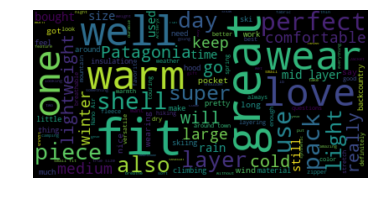

In [9]:
text = " ".join(df_reviews[df_reviews['Rating'] == 5]['Review'].values)
text = text.replace("jacket","")

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### What are Gearheads saying?

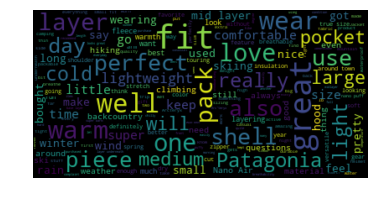

In [10]:
text = " ".join(df_reviews[df_reviews['Gearhead?'] == True]['Review'].values)
text = text.replace("jacket","")

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### What is the average Gearhead review?

what are gearheads rating products?
which brands are they rating?

In [11]:
df_reviews[df_reviews['Gearhead?'] == True].groupby(['Brand']).count()['Review']

Brand
Arc'teryx           36
Marmot               9
Outdoor Research    39
Patagonia           98
The North Face       5
Name: Review, dtype: int64

In [12]:
df_gh_reviews = df_reviews[df_reviews['Gearhead?'] == True]
df_gh_reviews.groupby(['Product']).sum(['Rating'])

TypeError: f() takes 1 positional argument but 2 were given

In [22]:
pd.DataFrame(df_gh_reviews.groupby(['Brand','Rating'])['Gearhead?'].count())

Gearhead?
Brand            Rating           
Arc'teryx        4.0             4
                 5.0            32
Marmot           4.0             3
                 5.0             6
Outdoor Research 4.0             5
                 5.0            32
Patagonia        2.0             1
                 4.0            11
                 5.0            82
The North Face   4.0             3
                 5.0             2

Mostly 4 and 5 star ratings from Gearheads, which is in line with the whole population of reviews.